In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test (1).csv")
train_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [3]:
test_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [4]:
train_data.shape
train_data.dtypes
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0
Age,750000.0,41.420404,15.175049,20.0,28.00,40.0,52.00,79.0
Height,750000.0,174.697685,12.824496,126.0,164.00,174.0,185.00,222.0
Weight,750000.0,75.145668,13.982704,36.0,63.00,74.0,87.00,132.0
Duration,750000.0,15.421015,8.354095,1.0,8.00,15.0,23.00,30.0
Heart_Rate,750000.0,95.483995,9.449845,67.0,88.00,95.0,103.00,128.0
Body_Temp,750000.0,40.036253,0.779875,37.1,39.60,40.3,40.70,41.5
Calories,750000.0,88.282781,62.395349,1.0,34.00,77.0,136.00,314.0


In [5]:
print(train_data.isnull().sum())

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


— Shape: (750000, 9)

— Data types:
 id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

— Head:
    id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

— Describe:
                count           mean            std    min        25%  \
id          750000.0  374999.500000  216506.495284    0.0  187499.75   
Age         750000.0      41.420404      15.175049   20.0      28.00   
Height      750000.0     174.697685      12

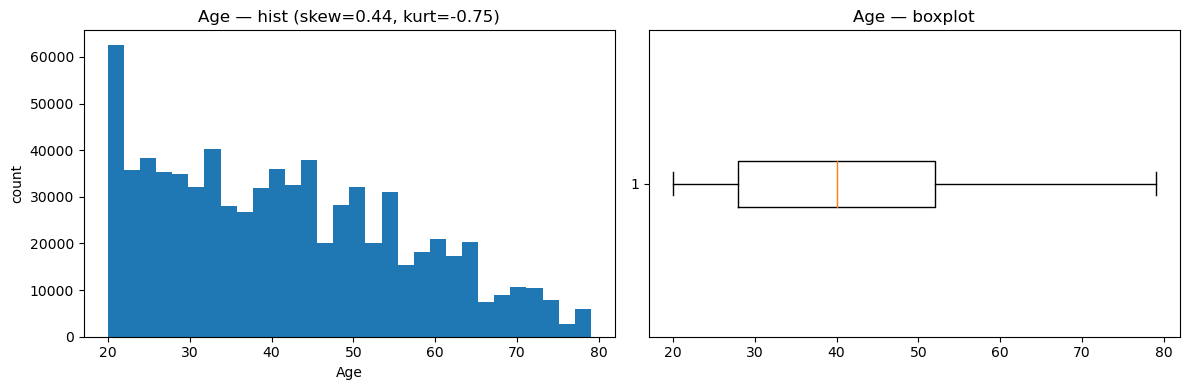

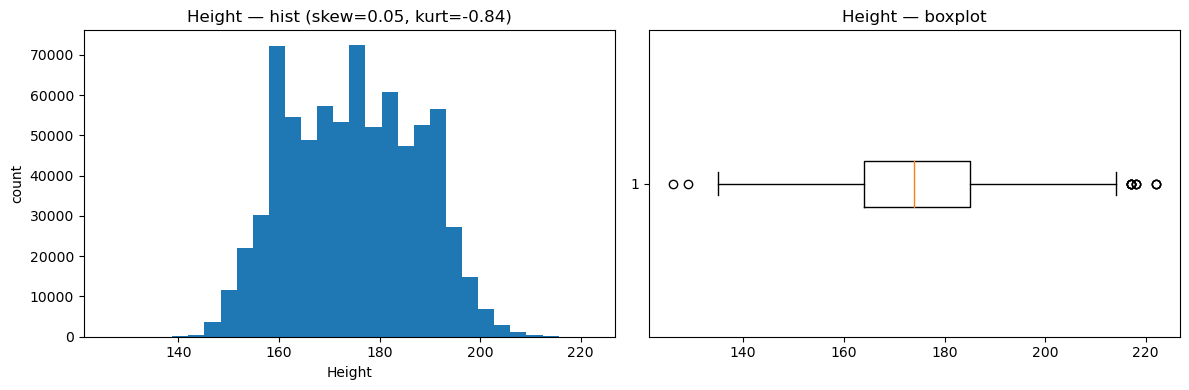

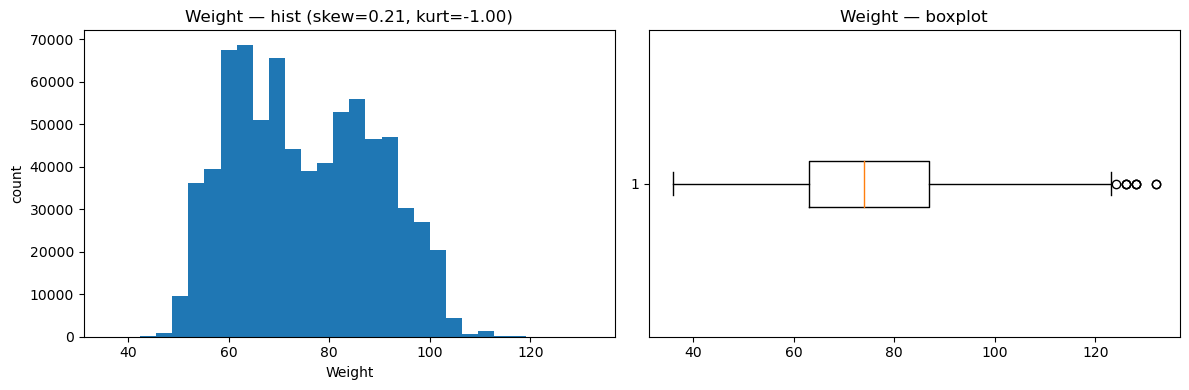

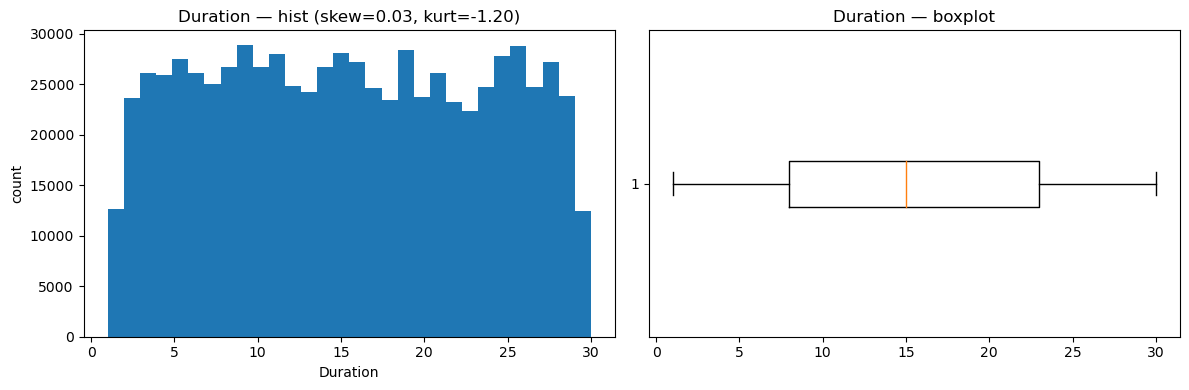

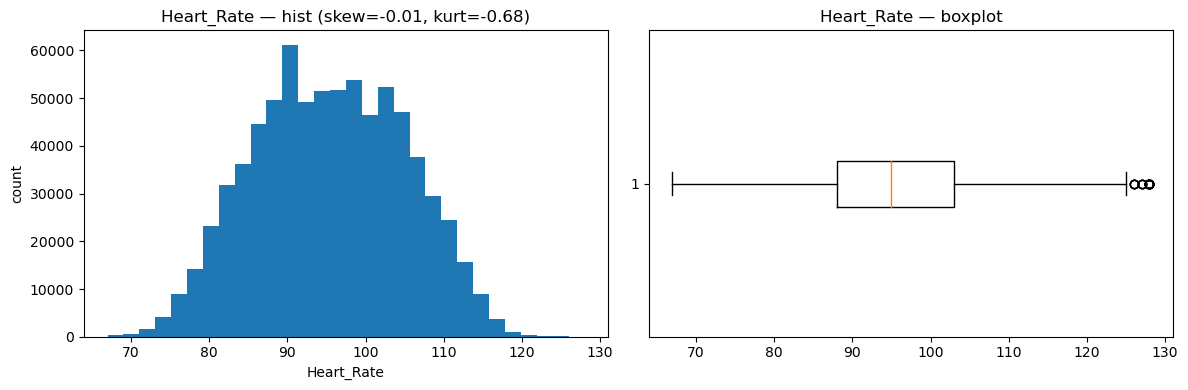

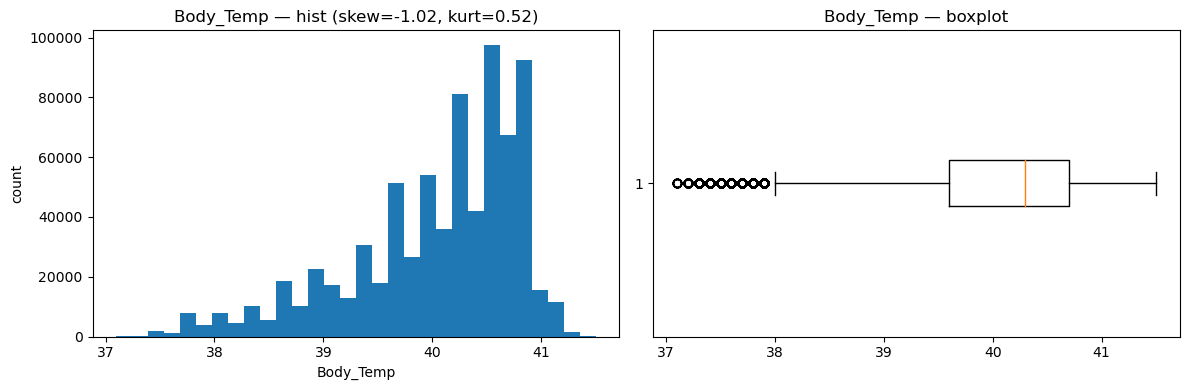

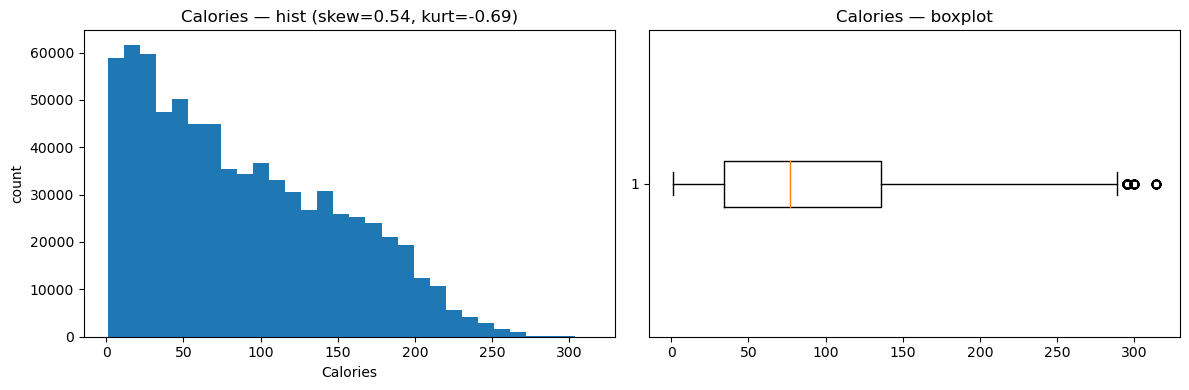

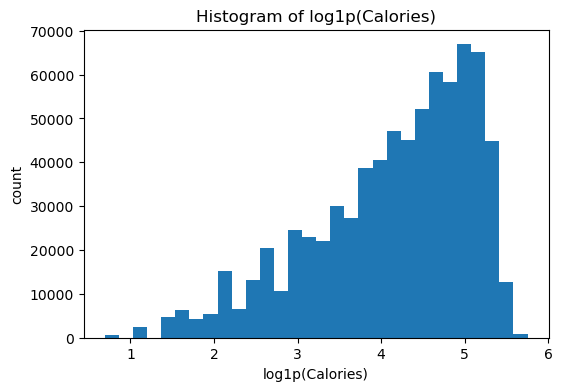


— Outlier counts per column:
   Age: 0 outliers
   Height: 14 outliers
   Weight: 9 outliers
   Duration: 0 outliers
   Heart_Rate: 36 outliers
   Body_Temp: 14919 outliers
   Calories: 139 outliers


In [6]:


# 1. Load data
df = pd.read_csv('train.csv')

# 2. Quick summary & missingness
print("— Shape:", df.shape)
print("\n— Data types:\n", df.dtypes)
print("\n— Head:\n", df.head())
print("\n— Describe:\n", df.describe().T)
print("\n— Missing values:\n", df.isnull().sum())

# 3. Define numeric columns (including the target)
numeric_cols = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']

# 4. Univariate plots + skew/kurtosis
for col in numeric_cols:
    series = df[col].dropna()
    skewness = series.skew()
    kurt = series.kurtosis()
    
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    # Histogram
    axes[0].hist(series, bins=30)
    axes[0].set_title(f'{col} — hist (skew={skewness:.2f}, kurt={kurt:.2f})')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('count')
    # Boxplot
    axes[1].boxplot(series, vert=False)
    axes[1].set_title(f'{col} — boxplot')
    
    plt.tight_layout()
    plt.show()

# 5. Special check: log-transform of target
log_cal = np.log1p(df['Calories'])
plt.figure(figsize=(6,4))
plt.hist(log_cal, bins=30)
plt.title('Histogram of log1p(Calories)')
plt.xlabel('log1p(Calories)')
plt.ylabel('count')
plt.show()

# 6. Outlier counts (1.5×IQR rule)
print("\n— Outlier counts per column:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)
    print(f"   {col}: {(mask).sum()} outliers")


That means we have to do log1p transformation of calories

Outliers: cap Weight (>120 kg?) and Height extremes

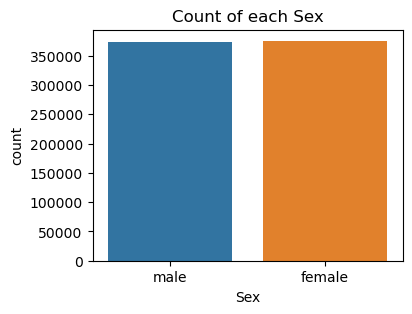

In [7]:
plt.figure(figsize=(4,3))
sns.countplot(x='Sex', data=train_data)
plt.title('Count of each Sex')
plt.show()


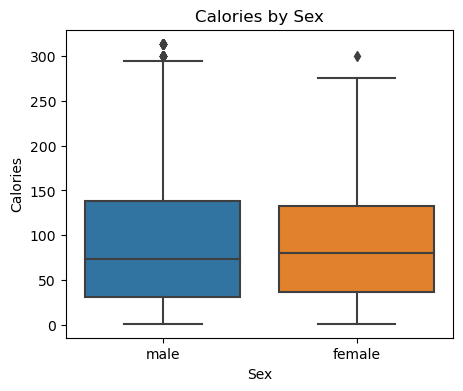

In [8]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Sex', y='Calories', data=train_data)
plt.title('Calories by Sex')
plt.show()


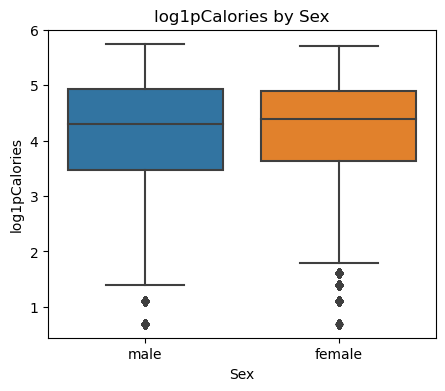

In [9]:
plt.figure(figsize=(5,4))
sns.boxplot(x = 'Sex', y = np.log1p(train_data['Calories']), data = train_data)
plt.title('log1pCalories by Sex')
plt.ylabel('log1pCalories')
plt.show()

In [10]:
print(df.groupby('Sex')['Calories'].agg(['count','mean','median','std']).round(3))

         count    mean  median     std
Sex                                   
female  375721  87.535    80.0  57.906
male    374279  89.034    73.0  66.590


In [11]:
train_data['Log_Calories'] = np.log1p(train_data['Calories'])
corr_cols = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Log_Calories']

corr = train_data[corr_cols].corr().round(2)
print("Correlation Matrix: \n", corr)

Correlation Matrix: 
                Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
Age           1.00    0.01    0.07      0.02        0.02       0.03   
Height        0.01    1.00    0.96     -0.03       -0.01      -0.03   
Weight        0.07    0.96    1.00     -0.02       -0.00      -0.02   
Duration      0.02   -0.03   -0.02      1.00        0.88       0.90   
Heart_Rate    0.02   -0.01   -0.00      0.88        1.00       0.80   
Body_Temp     0.03   -0.03   -0.02      0.90        0.80       1.00   
Log_Calories  0.12   -0.04   -0.03      0.94        0.88       0.95   

              Log_Calories  
Age                   0.12  
Height               -0.04  
Weight               -0.03  
Duration              0.94  
Heart_Rate            0.88  
Body_Temp             0.95  
Log_Calories          1.00  


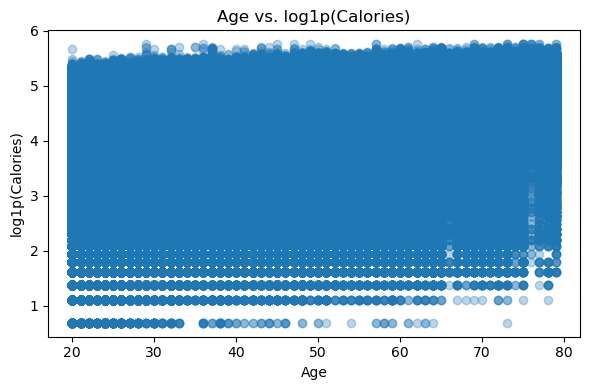

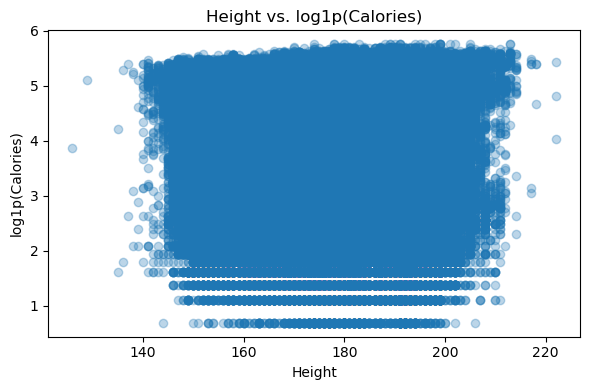

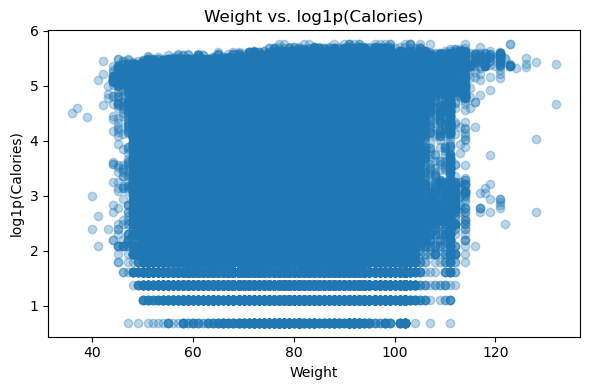

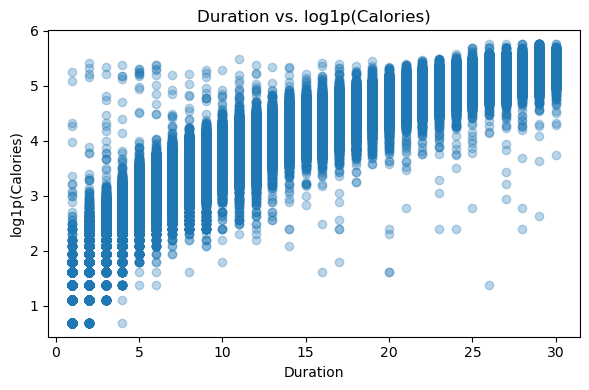

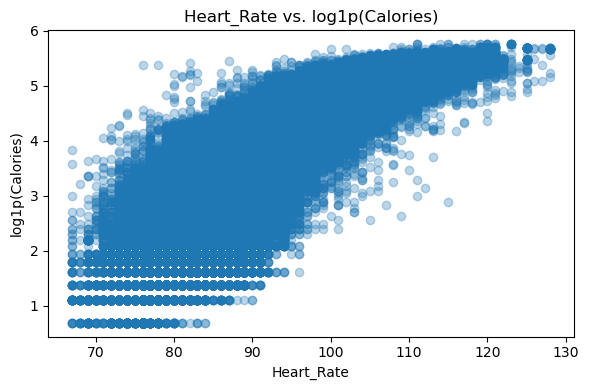

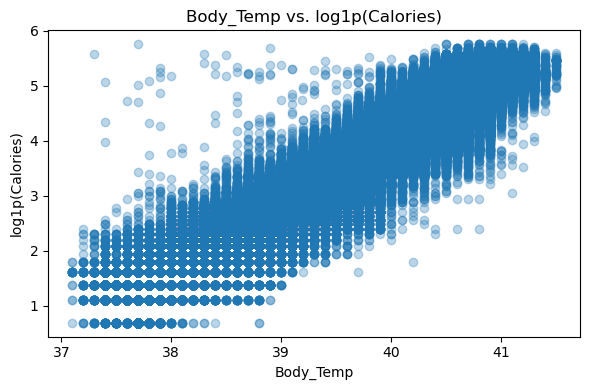

In [12]:
features = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']
for feat in features:
    plt.figure(figsize=(6,4))
    plt.scatter(train_data[feat], train_data['Log_Calories'], alpha = 0.3)
    plt.title(f'{feat} vs. log1p(Calories)')
    plt.xlabel(feat)
    plt.ylabel('log1p(Calories)')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

train_data['Sex_bin'] = train_data['Sex'].map({'male': 1, 'female':0})
train_data['BMI']         = train_data['Weight'] / (train_data['Height']/100)**2
train_data['Workload'] = train_data['Duration']*train_data['Heart_Rate']
train_data['EffortTemp'] = train_data['Duration']*train_data['Body_Temp']
train_data['temp_flag']=(train_data['Body_Temp']>37.5).astype(int)
features = ['Duration','Heart_Rate','Body_Temp','Age','Sex_bin','BMI','Workload','EffortTemp','temp_flag']

X = train_data[features]
y=train_data['Log_Calories']

kf    = KFold(n_splits=5, shuffle=True, random_state=100)
rmses = []

for tr_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

    model = Ridge()
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    rmses.append(mean_squared_error(y_val, preds, squared=False))

print(f'→ Ridge CV RMSLE: {np.mean(rmses):.4f} ± {np.std(rmses):.4f}')
coef = pd.Series(model.coef_, index=features)
coef = coef.reindex(coef.abs().sort_values(ascending=False).index)
print("Feature coefficients (by absolute magnitude):")
print(coef)


→ Ridge CV RMSLE: 0.1131 ± 0.0006
Feature coefficients (by absolute magnitude):
Duration      1.351305
Body_Temp     0.574316
Sex_bin      -0.046181
Heart_Rate    0.033425
EffortTemp   -0.030745
Age           0.006380
BMI           0.003995
temp_flag    -0.001459
Workload     -0.000541
dtype: float64


In [14]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf, rmses = KFold(5, shuffle=True, random_state=42), []
for tr, va in kf.split(X):
    X_tr, y_tr = X.iloc[tr], y.iloc[tr]
    X_va, y_va = X.iloc[va], y.iloc[va]
    
    model = lgb.LGBMRegressor(
        objective='regression',
        learning_rate=0.05,
        num_leaves=31,
        n_estimators=1000,
        random_state=42
    )
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric='rmse',
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=0)      # to suppress iteration logs
        ]
    )
    preds = model.predict(X_va)
    rmses.append(mean_squared_error(y_va, preds, squared=False))

print("LightGBM CV RMSLE:", np.mean(rmses))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Info] Start training from score 4.141163
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[992]	valid_0's rmse: 0.0630965	valid_0's l2: 0.00398117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Info] Start training from score 4.141466
Training until validatio

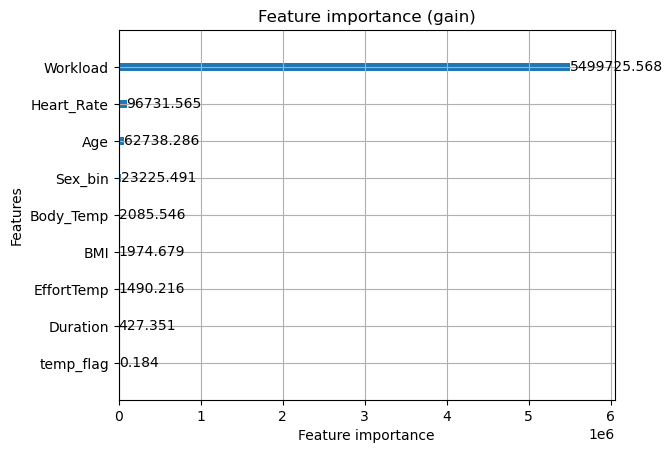

In [15]:
lgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title('Feature importance (gain)')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Info] Start training from score 4.141163
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[992]	valid_0's rmse: 0.0630965	valid_0's l2: 0.00398117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Info] Start training from score 4.141466
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0635	valid_0's l2:

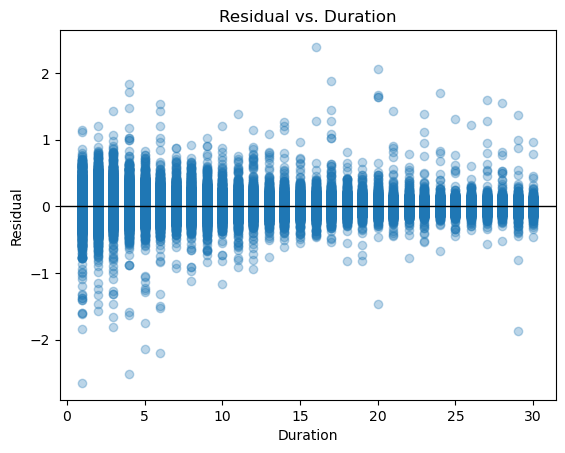

In [16]:
oof_preds = np.zeros_like(y)
for tr, va in kf.split(X):
    model.fit(X.iloc[tr], y.iloc[tr], eval_set=[(X.iloc[va], y.iloc[va])], eval_metric='rmse', callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=0)])
    oof_preds[va] = model.predict(X.iloc[va])

resids = oof_preds-y
plt.scatter(X['Duration'], resids, alpha = 0.3)
plt.axhline(0, color='black', lw=1)
plt.xlabel('Duration'); plt.ylabel('Residual')
plt.title('Residual vs. Duration'); plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

param_grid = {
    'feature_fraction':    [0.6, 0.7, 0.8],
    'bagging_fraction':    [0.6, 0.8],
    'bagging_freq':        [1, 5],
    'min_child_samples':   [20, 50, 100],
}

estimator = lgb.LGBMRegressor(
    objective='regression',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=500,
    random_state=42
)
rmse_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=3,
    scoring=rmse_scorer,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_rmse   = -grid_search.best_score_



Fitting 3 folds for each of 36 candidates, totalling 108 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in th

In [19]:
model = lgb.LGBMRegressor(
    objective='regression',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=1000,
    random_state=42,
    
    feature_fraction=best_params['feature_fraction'],
    bagging_fraction=best_params['bagging_fraction'],
    bagging_freq=best_params['bagging_freq'],
    min_child_samples=best_params['min_child_samples'],
)
model.fit(
    X, y,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[
      lgb.early_stopping(stopping_rounds=50),
      lgb.log_evaluation(period=0)
    ]
)



[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 9
[LightGBM] [Wa

LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8,
              learning_rate=0.05, n_estimators=1000, objective='regression',
              random_state=42)